##Team Members: Chirag Jadav and Harshil Prajapati


## DATA 601 Project-2
Due date: December 19, 2021. 23:59 pm.<br>
Groups will be determined at the December 6 class. <br>
<br>

For your second project, you will be working on the flights dataset that we used in Week-7. <br>
We have 5 csv files and 1 Excel file. You can learn more about the content of the csv files at <br>
https://cran.r-project.org/web/packages/nycflights13/nycflights13.pdf
<br>
<br>
<b> FILES </b>
* flights2DCMDVA.xlsx (Note that this is a smaller version of the original NYCflights13.csv data) <br>
* airlines.csv <br>
* airports.csv <br>
* planes.csv <br>
* weatherNYhourly.csv (NY hourly weather)<br>
* weatherMDdaily.xlsx (MD daily temperature/precip/snow data) <br>
* weatherNYdaily.xlsx (NY daily temperature/precip/snow data) <br>
* federal-holidays-2013.xlsx <br>
* flights_test_data.xlsx (only needed for Q4 and Q5)<br>
![image.png](attachment:88789893-961a-4c00-9ca0-5be37ef582d5.png)

We are only interested in flights from NY to three local airports:
* IAD: Dulles International Airport
* BWI: Baltimore/Washington International Thurgood Marshall Airport
* DCA: Ronald Reagan Washington National Airport

After carrying out EAD, please work on the following questions. You will need to submit your notebook and report (as a pdf file). <br> 
The report should include
* Names of the students, Title of the project (e.g. DATA 601 | Project 2| NY-DC/MD/VA Flights), and date
* A brief introduction
* Clear answers to the questions. Make sure that you have enough number of images with proper figure captions and numbering.

Answer following questions <br>

    1.1 Calculate the total number of seats for all the planned flights for each destination separately?
    1.2 What is the day of the year with the highest number of flights?
    1.3 What is the day of the year with the highest number of seats available on that day?    
    
    2.1 What day of the year most cancellations happened? 
    2.2 Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with some numbers.
    2.3 Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with some numbers.
    2.4 What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?
    2.5 Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)
    
    For the next group of questions, do not include the cancelled flights.
    3.1 Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.
    3.2 Is there a correlation between the weather datasets and daily average arrival delay?
    3.3 Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?
    3.4 Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)
    3.5 Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) 
    3.6 What day of the week we had the highest average delay?
    3.7 Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?
    3.8 Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately. 
 
    Download the "fligts_test_data.xlsx" dataset from https://github.com/simsekergun/DATA601/tree/main/2021Fall/Projects/Project2
    4. Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy.
    
    5. Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

##FILES IMPORTING AND DATAFRAME CREATION:

In [116]:
#Connect to data in google drive
#We have downloaded the all the necessary files and placed it on the drive location: "/content/drive/My Drive/Colab Notebooks/Data"

from google.colab import drive
import os
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Data
path=os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Data


In [117]:
#Creating the dataframes by reading the necessary files placed on the drive location:

import pandas as pd

flights2DCMDVA=pd.read_excel(path + '/flights2DCMDVA.xlsx')
airlines=pd.read_csv(path + '/airlines.csv')
airports=pd.read_csv(path + '/airports.csv')
planes=pd.read_csv(path + '/planes.csv')
weatherNYhourly=pd.read_csv(path + '/weatherNYhourly.csv')
weatherMDdaily=pd.read_excel(path + '/weatherMDdaily.xlsx')
weatherNYdaily=pd.read_excel(path + '/weatherNYdaily.xlsx')
federalholidays_2013=pd.read_excel(path + '/federal-holidays-2013.xlsx')
flights_test_data=pd.read_excel(path + '/flights_test_data.xlsx')

##QUESTION 1:
1.1 Calculate the total number of seats for all the planned flights for each destination separately?

1.2 What is the day of the year with the highest number of flights?

1.3 What is the day of the year with the highest number of seats available on that day?    

In [118]:
#################______QUESTION 1.1______#################
#1.1 Calculate the total number of seats for all the planned flights for each destination separately.
#To check the unique values in each column of the flights2DCMDVA and planes dataframe:
print(flights2DCMDVA.nunique())
print(planes.nunique())

year            1
month          12
day            31
dep_time     1095
dep_delay     305
arr_time     1116
arr_delay     354
carrier        10
tailnum       977
flight        370
origin          3
dest            3
air_time       67
distance        9
hour           24
minute         60
dtype: int64
tailnum         3322
year              46
type               3
manufacturer      35
model            127
engines            4
seats             48
speed             13
engine             6
dtype: int64


In [119]:
planes.describe()

,year,engines,seats,speed
count,3252.000000,3322.000000,3322.000000,23.000000
mean,2000.484010,1.995184,154.316376,236.782609
std,7.193425,0.117593,73.654974,149.759794
min,1956.000000,1.000000,2.000000,90.000000
25%,1997.000000,2.000000,140.000000,107.500000
50%,2001.000000,2.000000,149.000000,162.000000
75%,2005.000000,2.000000,182.000000,432.000000
max,2013.000000,4.000000,450.000000,432.000000


In [120]:
flights2DCMDVA.head(5)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0


In [121]:
#Joining the seats from plane dataframe with flights2DCMDVA

flights2DCMDVA_seats =flights2DCMDVA[['year', 'month', 'day', 'dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'carrier', 'tailnum', 'flight', 'origin', 'dest', 'air_time', 'distance', 'hour', 'minute']].merge(
    planes[['seats', 'tailnum']], left_on= 'tailnum', right_on= 'tailnum', how = 'left')
flights2DCMDVA_seats

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,seats
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,140.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,NaN
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,149.0
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,140.0
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,LGA,IAD,44.0,229,11.0,5.0,55.0
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,JFK,IAD,59.0,228,14.0,6.0,55.0
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,LGA,IAD,52.0,229,14.0,30.0,80.0
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,JFK,IAD,51.0,228,14.0,47.0,55.0


In [122]:
#Calculating the total number of seats for all the planned flights for each destination separately
flights2DCMDVA_grouped = flights2DCMDVA_seats.groupby(['dest'], axis=0, as_index=True).agg({'seats':'sum'}).reset_index()
flights2DCMDVA_grouped.sort_values(by='seats',ascending=False)

,dest,seats
1,DCA,906225.0
2,IAD,296004.0
0,BWI,96135.0


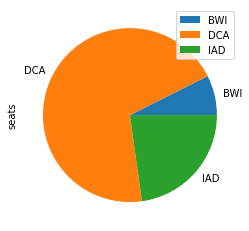

In [123]:
plot = flights2DCMDVA_grouped.plot.pie(y='seats',figsize=(4,4),labels=['BWI','DCA','IAD'])

In [124]:
#################______QUESTION 1.2______#################
# 1.2 What is the day of the year with the highest number of flights?

#adding new column date based on columns year, month, date
import pandas as pd

flights2DCMDVA_seats['date'] = pd.to_datetime(flights2DCMDVA_seats[["year", "month", "day"]])
flights2DCMDVA_seats

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,seats,date
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,140.0,2013-01-01
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,NaN,2013-01-01
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,149.0,2013-01-01
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,140.0,2013-01-01
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,55.0,2013-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,LGA,IAD,44.0,229,11.0,5.0,55.0,2013-12-31
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,JFK,IAD,59.0,228,14.0,6.0,55.0,2013-12-31
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,LGA,IAD,52.0,229,14.0,30.0,80.0,2013-12-31
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,JFK,IAD,51.0,228,14.0,47.0,55.0,2013-12-31


In [125]:
import datetime as dt
flights2DCMDVA_seats['day_of_week'] = flights2DCMDVA_seats['date'].dt.day_name()
flights2DCMDVA_seats

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,seats,date,day_of_week
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,140.0,2013-01-01,Tuesday
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,NaN,2013-01-01,Tuesday
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,149.0,2013-01-01,Tuesday
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,140.0,2013-01-01,Tuesday
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,55.0,2013-01-01,Tuesday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,LGA,IAD,44.0,229,11.0,5.0,55.0,2013-12-31,Tuesday
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,JFK,IAD,59.0,228,14.0,6.0,55.0,2013-12-31,Tuesday
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,LGA,IAD,52.0,229,14.0,30.0,80.0,2013-12-31,Tuesday
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,JFK,IAD,51.0,228,14.0,47.0,55.0,2013-12-31,Tuesday


In [126]:
#To check the day with the highest number of flights

flights2DCMDVA_seats.groupby('day_of_week')['flight'].count().idxmax()
print('The day of the year with the highest number of flights is: "{}"'.format(flights2DCMDVA_seats.groupby('day_of_week')['flight'].count().idxmax()))

The day of the year with the highest number of flights is: "Wednesday"


In [127]:
##Let's check the date with the highest number of flights as well

flights2DCMDVA_seats['date'].mode()

0   2013-01-11
1   2013-01-17
dtype: datetime64[ns]

In [128]:
#################______QUESTION 1.3______#################
#1.3 What is the day of the year with the highest number of seats available on that day?

#To check the day of the year with the highest number of seats available on that day

flights2DCMDVA_seats.groupby('date')['seats'].sum().idxmax()
print('The day of the year with the highest number of seats available on that day is: "{}"'.format(flights2DCMDVA_seats.groupby('date')['seats'].sum().idxmax()))

The day of the year with the highest number of seats available on that day is: "2013-02-28 00:00:00"


In [129]:
#To find the day having maximum number of flights and the total number of seats on that day

flights2DCMDVA_seats.groupby(['date','day_of_week'])['seats'].sum().reset_index(name='total_seats').sort_values(['total_seats'],ascending=False)

,date,day_of_week,total_seats
58,2013-02-28,Thursday,5379.0
10,2013-01-11,Friday,5318.0
6,2013-01-07,Monday,5272.0
23,2013-01-24,Thursday,5268.0
37,2013-02-07,Thursday,5267.0
...,...,...,...
332,2013-11-29,Friday,1029.0
284,2013-10-12,Saturday,970.0
357,2013-12-24,Tuesday,924.0
358,2013-12-25,Wednesday,895.0


In [130]:
# to find the "day" of week having maximum number of seats throughout year 2013
flights2DCMDVA_seats.groupby('day_of_week')['seats'].sum()

day_of_week
Friday       217705.0
Monday       219445.0
Saturday      74573.0
Sunday       125797.0
Thursday     214929.0
Tuesday      223496.0
Wednesday    222419.0
Name: seats, dtype: float64

##QUESTION 2:

2.1 What day of the year most cancellations happened?

2.2 Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with some numbers.

2.3 Is there any relationship between the Federal Holiday Schedule and cancellations? If yes, describe it and justify with some numbers.

2.4 What is the total number of seats for the cancelled flights? If we assume the average flight price of $50, what is the total economis loss?

2.5 Determine the ratio of cancelled flights/planned flights for each airline company, list it, and determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)

In [131]:
#################______QUESTION 2.1______#################
#2.1 What day of the year most cancellations happened?

#Finding all the null values:
flights2DCMDVA_seats.isna().sum()

year              0
month             0
day               0
dep_time        939
dep_delay       939
arr_time        986
arr_delay      1002
carrier           0
tailnum         375
flight            0
origin            0
dest              0
air_time       1002
distance          0
hour            939
minute          939
seats          2872
date              0
day_of_week       0
dtype: int64

Since dep_time and dep_delay is showing the same number for null values, we will consider null values of dep_delay as cancelled flights. Will carry further analysis...

In [132]:
#Creating new DF having the NULL values of the Departure Time:

flights2DCMDVA_cancelled = flights2DCMDVA_seats[flights2DCMDVA_seats.dep_time.isna()]
flights2DCMDVA_cancelled

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,seats,date,day_of_week
136,2013,1,13,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-01-13,Sunday
137,2013,1,13,NaN,NaN,NaN,NaN,MQ,N655MQ,3944,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-01-13,Sunday
167,2013,1,16,NaN,NaN,NaN,NaN,9E,NaN,3635,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-01-16,Wednesday
204,2013,1,20,NaN,NaN,NaN,NaN,EV,N16178,4316,EWR,BWI,NaN,169,NaN,NaN,55.0,2013-01-20,Sunday
213,2013,1,21,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-01-21,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,2013,12,26,NaN,NaN,NaN,NaN,EV,N877AS,5712,JFK,IAD,NaN,228,NaN,NaN,55.0,2013-12-26,Thursday
17116,2013,12,26,NaN,NaN,NaN,NaN,EV,N877AS,5736,LGA,IAD,NaN,229,NaN,NaN,55.0,2013-12-26,Thursday
17147,2013,12,29,NaN,NaN,NaN,NaN,EV,N835AS,5769,LGA,IAD,NaN,229,NaN,NaN,55.0,2013-12-29,Sunday
17157,2013,12,30,NaN,NaN,NaN,NaN,EV,N832AS,5714,JFK,IAD,NaN,228,NaN,NaN,55.0,2013-12-30,Monday


In [133]:
flights2DCMDVA_cancelled['date'].mode()

0   2013-03-06
dtype: datetime64[ns]

In [134]:
#To check which day has the highest cancellation

print('The day of the year most cancellations happened is: "{}"'.format(flights2DCMDVA_cancelled['date'].mode()))

The day of the year most cancellations happened is: "0   2013-03-06
dtype: datetime64[ns]"


In [135]:
#days of the year having cancelled flights in descending order
flights2DCMDVA_cancelled.groupby(['date','day_of_week'])['date'].count().reset_index(name='flights_cancelled').sort_values(['flights_cancelled'],ascending=False)

,date,day_of_week,flights_cancelled
44,2013-03-06,Wednesday,46
23,2013-02-08,Friday,33
161,2013-09-12,Thursday,25
46,2013-03-08,Friday,23
94,2013-05-23,Thursday,21
...,...,...,...
142,2013-08-06,Tuesday,1
140,2013-08-02,Friday,1
41,2013-03-03,Sunday,1
137,2013-07-29,Monday,1


In [136]:
#################______QUESTION 2.2______#################
#2.2 Is there any relationship between the weather datasets and cancellations? If yes, describe it and justify with some numbers.
import re

def Date_time(df):
    date_val = []
    for time_hour in df['time_hour']:
        for date in re.findall(r"[0-9]+-[0-9]+-[0-9]+",time_hour):
            date_val.append(date)
    df['date'] = date_val
    return df

if __name__ == "__main__":
    print(Date_time(weatherNYhourly))

def date_val(df):
    df = df.reset_index()
    date_val = []
    for i in range(len(df['year'])):
        if df['month'][i]<10:
            date = str(df['year'][i])+'-'+'0'+str(df['month'][i])+'-'+str(df['day'][i])
        else:
            date = str(df['year'][i])+'-'+str(df['month'][i])+'-'+str(df['day'][i])
        date_val.append(date)
    df['date'] = date_val
    return df

if __name__ == "__main__":
    flights2DCMDVA_cancelled = date_val(flights2DCMDVA_cancelled)

Canceled_flights_dataframe = flights2DCMDVA_cancelled[['date','flight','tailnum']]
Canceled_flight_count = Canceled_flights_dataframe.groupby('date')['flight'].count().reset_index(name="count")
Weatherdf_flight_info = pd.merge(weatherNYhourly,Canceled_flight_count,on='date',how = 'outer')
Canceled_fight_weatherinfo = Weatherdf_flight_info [(pd.notna(Weatherdf_flight_info['count']))&(pd.notna(Weatherdf_flight_info['origin']))]
Canceled_fight_weatherinfo = Canceled_fight_weatherinfo.reset_index()
Canceled_fight_weatherinfo
#Weather = weatherMDdaily.merge(weatherNYdaily, left_on = 'Date', right_on= 'Date', how='left', suffixes= ["_MD", "_NY"])
#Weather

      origin  year  month  ...  visib             time_hour        date
0        EWR  2013      1  ...   10.0  2013-01-01T06:00:00Z  2013-01-01
1        EWR  2013      1  ...   10.0  2013-01-01T07:00:00Z  2013-01-01
2        EWR  2013      1  ...   10.0  2013-01-01T08:00:00Z  2013-01-01
3        EWR  2013      1  ...   10.0  2013-01-01T09:00:00Z  2013-01-01
4        EWR  2013      1  ...   10.0  2013-01-01T10:00:00Z  2013-01-01
...      ...   ...    ...  ...    ...                   ...         ...
26110    LGA  2013     12  ...   10.0  2013-12-30T19:00:00Z  2013-12-30
26111    LGA  2013     12  ...   10.0  2013-12-30T20:00:00Z  2013-12-30
26112    LGA  2013     12  ...   10.0  2013-12-30T21:00:00Z  2013-12-30
26113    LGA  2013     12  ...   10.0  2013-12-30T22:00:00Z  2013-12-30
26114    LGA  2013     12  ...   10.0  2013-12-30T23:00:00Z  2013-12-30

[26115 rows x 16 columns]


,index,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,date,count
0,699,EWR,2013.0,1.0,10.0,19.0,44.06,23.00,43.02,340.0,4.60312,NaN,0.0,1033.6,10.0,2013-01-11T00:00:00Z,2013-01-11,1.0
1,700,EWR,2013.0,1.0,10.0,20.0,44.06,23.00,43.02,340.0,6.90468,NaN,0.0,1034.0,10.0,2013-01-11T01:00:00Z,2013-01-11,1.0
2,701,EWR,2013.0,1.0,10.0,21.0,41.00,24.98,52.56,10.0,8.05546,NaN,0.0,1033.5,10.0,2013-01-11T02:00:00Z,2013-01-11,1.0
3,702,EWR,2013.0,1.0,10.0,22.0,39.02,24.98,56.77,30.0,8.05546,NaN,0.0,1034.0,10.0,2013-01-11T03:00:00Z,2013-01-11,1.0
4,703,EWR,2013.0,1.0,10.0,23.0,39.92,24.08,52.79,0.0,0.00000,NaN,0.0,1034.4,10.0,2013-01-11T04:00:00Z,2013-01-11,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11195,26110,LGA,2013.0,12.0,30.0,14.0,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,2013-12-30T19:00:00Z,2013-12-30,3.0
11196,26111,LGA,2013.0,12.0,30.0,15.0,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,2013-12-30T20:00:00Z,2013-12-30,3.0
11197,26112,LGA,2013.0,12.0,30.0,16.0,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,2013-12-30T21:00:00Z,2013-12-30,3.0
11198,26113,LGA,2013.0,12.0,30.0,17.0,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,2013-12-30T22:00:00Z,2013-12-30,3.0


In [137]:
class visual_represantation:
    def __init__(self,dataframe,xvalue,yvalue,xlabel,ylabel,title):       
        self.dataframe = dataframe
        self.xvalue = xvalue
        self.yvalue  = yvalue
        self.xlabel = xlabel
        self.ylabel = ylabel
        self.title = title
        
    """Creating the different visual charts for understanding"""
    def boxplot_plot(self):
        sns.boxplot(self.dataframe)
        plt.xlabel(self.xlabel);
        plt.ylabel(self.ylabel);
        plt.title(self.title);
        
      
    def countplot_without_percentage_representation(self):
        sns.set_style("darkgrid")
        sns.countplot(x=self.xvalue,data=self.dataframe)
        plt.xlabel(self.xlabel);
        plt.ylabel(self.ylabel);
        plt.title(self.title);
        plt.show()
        
        
        
    def countplot_with_percentage_representation(self):
        sns.set_style("darkgrid")
        ax = sns.countplot(x=self.xvalue,data=self.dataframe)
        total = len(self.dataframe)
        for p in ax.patches:
            percentage = '{:.1f}%'.format(100 * p.get_height()/total)
            x = p.get_x() + p.get_width()
            y = p.get_height()
            ax.annotate(percentage, (x, y),ha='right')
        plt.xlabel(self.xlabel);
        plt.ylabel(self.ylabel);
        plt.title(self.title);
        plt.show()
        
    
    def lineplot(self):
        sns.lineplot(x = self.xvalue,y=self.yvalue, hue="Holiday Flag", style="Holiday Flag", markers=["o", "o"], data = self.dataframe)
        plt.xlabel(self.xlabel);
        plt.ylabel(self.ylabel);
        plt.title(self.title);
        plt.show();
    
    
    
        
    """Scatter plot to see the multivariate outlier"""
    def scatterplot(self):
        sns.scatterplot(x=self.xvalue,y=self.yvalue,data=self.dataframe)
        plt.xlabel(self.xlabel);
        plt.title(self.title);
        plt.show()
        
        
    def heatmap(self):
        correlation_data = self.dataframe.corr()
        sns.heatmap(correlation_data,linewidth = 3,vmin=0, vmax=1)
        plt.xlabel(self.xlabel);
        plt.title(self.title);
        plt.figure(figsize=(60,40));
        plt.show();
        
    def violinplot(self):
        sns.violinplot(data=self.dataframe,x=self.xvalue,y=self.yvalue,split=True,inner="quart",linewidth=1,palette={'Yes':"b","No":".85"})
        sns.despine(left=True)
        plt.xlabel(self.xlabel);
        plt.title(self.title);
        plt.show()

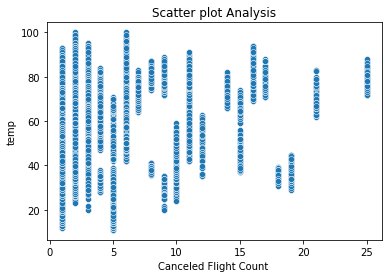

In [138]:
#### temp,dewp,humid,wind_dir,wind_speed precip,pressure,visib are the important weather feature 

### Created the data frame which consist the canceled flight count 
import matplotlib.pyplot as plt
import seaborn as sns
"""First Step: Visualisation"""

if __name__ == "__main__":
    Scatter_plt = visual_represantation(Canceled_fight_weatherinfo,'count','temp','Canceled Flight Count ','Temp','Scatter plot Analysis')
    Scatter_plt.scatterplot()

No Specific Linear Trend between Cancelled Flight and Temp

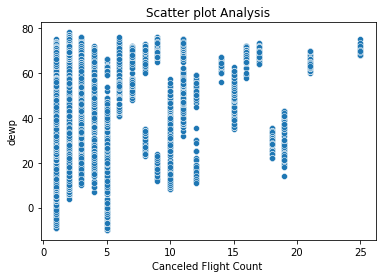

In [139]:
if __name__ == "__main__":
    Scatter_plt_dewp = visual_represantation(Canceled_fight_weatherinfo,'count','dewp','Canceled Flight Count ','dewp','Scatter plot Analysis')
    Scatter_plt_dewp.scatterplot()

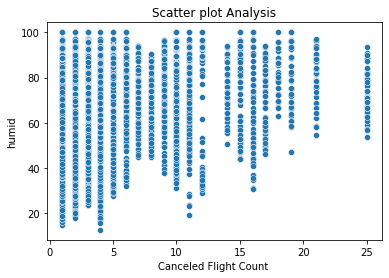

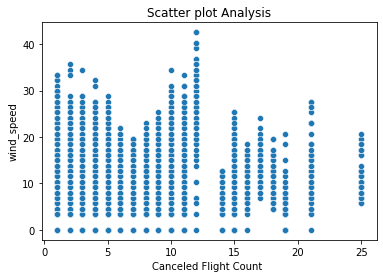

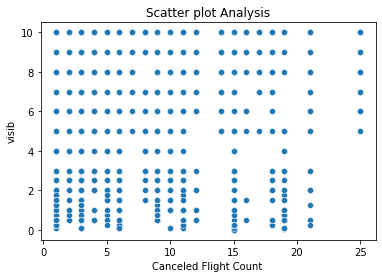

In [140]:
#plotting cancelled flight against humidity data
if __name__ == "__main__":
    Scatter_plt_humid = visual_represantation(Canceled_fight_weatherinfo,'count','humid','Canceled Flight Count ','humid','Scatter plot Analysis')
    Scatter_plt_humid.scatterplot()

#plotting cancelled flight against wind_speed data
if __name__ == "__main__":
    Scatter_plt_wind = visual_represantation(Canceled_fight_weatherinfo,'count','wind_speed','Canceled Flight Count ','wind_speed','Scatter plot Analysis')
    Scatter_plt_wind.scatterplot()

#plotting cancelled flight against visilibity data
if __name__ == "__main__":
    Scatter_plt_visib = visual_represantation(Canceled_fight_weatherinfo,'count','visib','Canceled Flight Count ','visib','Scatter plot Analysis')
    Scatter_plt_visib.scatterplot()

We do not see any specific trend between cancelled flights and weather data. Nothing concrete to establish a trend or pattern.

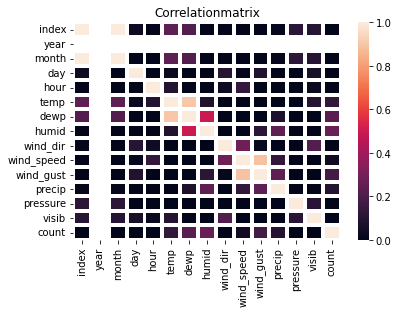

<Figure size 4320x2880 with 0 Axes>

In [141]:
#finding correlation of weather data and cancelled flight
visual_represantation(Canceled_fight_weatherinfo,"","","","","Correlationmatrix").heatmap()

In [142]:
Canceled_fight_weatherinfo.corr()

,index,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,count
index,1.000000,NaN,0.998308,0.034351,-0.001053,0.243048,0.215427,0.001849,0.009523,-0.083097,-0.201953,0.012838,0.113695,0.103834,-0.110434
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,0.998308,NaN,1.000000,-0.023309,-0.001041,0.243343,0.217639,0.007052,0.003308,-0.083815,-0.207288,0.014397,0.118267,0.100167,-0.106606
day,0.034351,NaN,-0.023309,1.000000,-0.044017,0.028223,-0.007229,-0.083951,0.104322,0.012790,0.088793,-0.026007,-0.095410,0.064710,-0.059783
hour,-0.001053,NaN,-0.001041,-0.044017,1.000000,0.090393,-0.006411,-0.182403,0.035794,0.140018,-0.056057,-0.001510,-0.028509,0.029005,0.000734
temp,0.243048,NaN,0.243343,0.028223,0.090393,1.000000,0.903415,0.087545,-0.077100,-0.095174,-0.243021,-0.012940,-0.321914,0.097116,0.136406
dewp,0.215427,NaN,0.217639,-0.007229,-0.006411,0.903415,1.000000,0.498465,-0.193868,-0.161790,-0.174932,0.077866,-0.344901,-0.110535,0.227445
humid,0.001849,NaN,0.007052,-0.083951,-0.182403,0.087545,0.498465,1.000000,-0.300916,-0.162376,0.111899,0.247695,-0.182273,-0.532850,0.266520
wind_dir,0.009523,NaN,0.003308,0.104322,0.035794,-0.077100,-0.193868,-0.300916,1.000000,0.279802,0.017857,-0.086838,-0.180753,0.211623,-0.093794
wind_speed,-0.083097,NaN,-0.083815,0.012790,0.140018,-0.095174,-0.161790,-0.162376,0.279802,1.000000,0.892610,0.134023,-0.202094,-0.027372,0.043944


In [143]:
#################______QUESTION 2.3______#################
#Importing the federal holiday DF by removing the first and last rows
import pandas as pd

federalholidays_2013=pd.read_excel(path + '/federal-holidays-2013.xlsx',header =1, skipfooter = 1)
federalholidays_2013

,Date,Federal holiday,Day of the week
0,"January 1, 2013",New Year's Day,Tuesday
1,"January 21, 2013",Martin Luther King Day,Monday
2,"February 18, 2013",Presidents' Day,Monday
3,"May 27, 2013",Memorial Day,Monday
4,"July 4, 2013",Independence Day,Thursday
5,"September 2, 2013",Labor Day,Monday
6,"October 14, 2013",Columbus Day,Monday
7,"November 11, 2013",Veterans Day,Monday
8,"November 28, 2013",Thanksgiving Day,Thursday
9,"December 25, 2013",Christmas Day,Wednesday


In [144]:
federalholidays_2013.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             10 non-null     object
 1   Federal holiday  10 non-null     object
 2   Day of the week  10 non-null     object
dtypes: object(3)
memory usage: 368.0+ bytes


In [145]:
federalholidays_2013["Date_format"] = pd.to_datetime(federalholidays_2013["Date"])
federalholidays_2013

,Date,Federal holiday,Day of the week,Date_format
0,"January 1, 2013",New Year's Day,Tuesday,2013-01-01
1,"January 21, 2013",Martin Luther King Day,Monday,2013-01-21
2,"February 18, 2013",Presidents' Day,Monday,2013-02-18
3,"May 27, 2013",Memorial Day,Monday,2013-05-27
4,"July 4, 2013",Independence Day,Thursday,2013-07-04
5,"September 2, 2013",Labor Day,Monday,2013-09-02
6,"October 14, 2013",Columbus Day,Monday,2013-10-14
7,"November 11, 2013",Veterans Day,Monday,2013-11-11
8,"November 28, 2013",Thanksgiving Day,Thursday,2013-11-28
9,"December 25, 2013",Christmas Day,Wednesday,2013-12-25


In [146]:
#This merge is taking Date and day of the week attribute twice in the data frame. Consider the code in below cell.
flights2DCMDVA_cancelled['date'] = pd.to_datetime(flights2DCMDVA_cancelled['date'])

flight_holidays = pd.merge(flights2DCMDVA_cancelled,federalholidays_2013,left_on='date',right_on='Date_format',how='inner')
flight_holidays.head(2)

,index,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,seats,date,day_of_week,Date,Federal holiday,Day of the week,Date_format
0,213,2013,1,21,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN,NaN,2013-01-21,Monday,"January 21, 2013",Martin Luther King Day,Monday,2013-01-21
1,1503,2013,1,21,NaN,NaN,NaN,NaN,9E,NaN,4127,JFK,IAD,NaN,228,NaN,NaN,NaN,2013-01-21,Monday,"January 21, 2013",Martin Luther King Day,Monday,2013-01-21


In [147]:
holiday_info = flight_holidays.groupby(['Federal holiday','date']).agg({'dep_time':'size'}).reset_index()
holiday_info.rename(columns={'dep_time': 'cancelled_flights'},inplace=True)
holiday_info.sort_values(by='cancelled_flights', ascending=False)

,Federal holiday,date,cancelled_flights
1,Labor Day,2013-09-02,8
2,Martin Luther King Day,2013-01-21,2
0,Christmas Day,2013-12-25,1
3,Veterans Day,2013-11-11,1


We can see that there are many flights cancelled on Labor Day. Sum of total_flights cancelled during federal holidays is just 12. We don't see any strong relation or trend between flight cancellation and federal holidays.

In [148]:
#################______QUESTION 2.4______#################
#total seats for the cancelled flights

flights2DCMDVA_cancelled.seats.sum()
print('The total seats for the cancelled flights is : "{}"'.format(flights2DCMDVA_cancelled.seats.sum()))
print('If the average price for the flight is assumed to be 50 USD, then the total economic loss due to the cancelled flight is $',50*flights2DCMDVA_cancelled.seats.sum(), 'USD.')

The total seats for the cancelled flights is : "24032.0"
If the average price for the flight is assumed to be 50 USD, then the total economic loss due to the cancelled flight is $ 1201600.0 USD.


In [149]:
flights2DCMDVA_seats.notnull().sum()

year           17166
month          17166
day            17166
dep_time       16227
dep_delay      16227
arr_time       16180
arr_delay      16164
carrier        17166
tailnum        16791
flight         17166
origin         17166
dest           17166
air_time       16164
distance       17166
hour           16227
minute         16227
seats          14294
date           17166
day_of_week    17166
dtype: int64

In [150]:
#################______QUESTION 2.5______#################
#2.5 Determine the ratio of cancelled flights/planned flights for each airline company, list it, and 
#determine the most and least reliable airline company (most reliable = the one that has the smallest ratio of cancelled/planned)
x1 = flights2DCMDVA_seats[flights2DCMDVA_seats['dep_time'].notna()]
x = x1.groupby('carrier').agg({'dep_time': 'size'})
y = flights2DCMDVA_cancelled.groupby('carrier').agg({'dep_time': 'size'})
df1 = y/x*100
df1.rename(columns={'dep_time': 'cancelled/planned_ratio'},inplace=True)
df1.sort_values(by='cancelled/planned_ratio', ascending=False)

,cancelled/planned_ratio
carrier,
YV,11.469534
EV,6.427452
MQ,6.195426
9E,5.882353
US,5.110466
WN,4.000000
B6,1.199400
DL,NaN
OO,NaN


If we consider the above results, DL, OO and UA does not have any cancellations of the flights. So this makes them highly reliable. If we consider the flights having cancellation data, then most reliable is B6 and the least reliable is YV airlines.

##QUESTION 3:

For the next group of questions, do not include the cancelled flights.

3.1 Calculate the average arrival delay for all the flights that took place in the same day and plot it (x = 1:365, y = daily average delay). On the same plot, please mark the Federal Holidays from the federal-holidays-2013.xlsx dataset.

3.2 Is there a correlation between the weather datasets and daily average arrival delay?

3.3 Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?

3.4 Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) and determine most and least reliables (most reliable = the one that has the shortest average delay)

3.5 Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay) 

3.6 What day of the week we had the highest average delay?

3.7 Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?

3.8 Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.

In [151]:
#creating a dataframe planned flights to exclude cancelled flights from the data
planned_flights = flights2DCMDVA[flights2DCMDVA['dep_time'].notnull()]
planned_flights.head(2)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0


In [152]:
#creaing new dataframe new_df for this question
#creating new column of date in the flights dataset from year, month and day columns
import numpy as np

new_df = planned_flights
new_df['Date']=pd.to_datetime(new_df[['year','month','day']])

#creating dataframe of for avg arrival delay where avg arrival delay for each day has been calculated.
avg_arr_delay = new_df[["Date","arr_delay"]].resample('D', on='Date').mean().reset_index().sort_values("Date")

#reading federal holidays file again and creating new column Date in it
federalholidays = pd.read_excel(path + '/federal-holidays-2013.xlsx')
federalholidays.columns = federalholidays.iloc[0]
federalholidays= federalholidays[1:-1]
federalholidays['Date'] = pd.to_datetime(federalholidays['Date'])

#creating another column of federal holidays in  avg_arr_delay dataframe
avg_arr_delay["Federal holiday"] = np.where(avg_arr_delay["Date"].isin(federalholidays["Date"]),"Holiday","Not an Holiday")


# Plotting graph for the avg arrival delay for each date and showing marks of federal holidays on the same as well
import plotly.express as px

fig = px.bar(avg_arr_delay, x="Date", y="arr_delay", title = 'Average Daily Arrival Delay') # create the plot
fig.add_trace(px.scatter(avg_arr_delay, x="Date", y="arr_delay", color="Federal holiday", color_discrete_sequence=['red']).data[0])
fig.show() # display plot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [153]:
    #################______QUESTION 3.2______#################
#3.2 Is there a correlation between the weather datasets and daily average arrival delay
#weather_info 
weatherNYhourly['date'] = pd.to_datetime(weatherNYhourly['date'])
weather_info = pd.merge(weatherNYhourly, planned_flights[['arr_time', 'arr_delay','air_time','distance','hour','minute','Date']], left_on='date',right_on='Date', how = 'inner')
weather_info = pd.merge(weather_info,avg_arr_delay[['arr_delay','Date']],left_on='date',right_on='Date', how='inner')
weather_info.head(5)

,origin,year,month,day,hour_x,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,date,arr_time,arr_delay_x,air_time,distance,hour_y,minute,Date_x,arr_delay_y,Date_y
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z,2013-01-01,721.0,-19.0,40.0,185,6.0,29.0,2013-01-01,34.075,2013-01-01
1,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z,2013-01-01,1001.0,851.0,41.0,184,8.0,48.0,2013-01-01,34.075,2013-01-01
2,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z,2013-01-01,1201.0,-14.0,43.0,185,10.0,59.0,2013-01-01,34.075,2013-01-01
3,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z,2013-01-01,1256.0,-4.0,38.0,169,11.0,58.0,2013-01-01,34.075,2013-01-01
4,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z,2013-01-01,1412.0,-3.0,38.0,169,13.0,16.0,2013-01-01,34.075,2013-01-01


In [154]:
weather_df = weather_info.drop(columns = ['origin','year','month','day','hour_x','arr_delay_x','arr_time','Date_x','Date_y','time_hour'])
weather_df.rename(columns={'hour_y' : 'hour', 'arr_delay_y':'avg_arr_delay'},inplace=True)

In [155]:
weather_df.corr()

,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,air_time,distance,hour,minute,avg_arr_delay
temp,1.000000,0.894216,0.088507,-0.120328,-0.105343,-0.303708,0.013484,-0.226182,0.069391,-0.060131,0.093841,-0.002027,0.005542,0.061730
dewp,0.894216,1.000000,0.516782,-0.244920,-0.162622,-0.254739,0.093008,-0.259032,-0.135542,-0.008392,0.085320,0.000417,-0.006689,0.194256
humid,0.088507,0.516782,1.000000,-0.327054,-0.158428,0.050655,0.216046,-0.164163,-0.515866,0.104940,0.010882,0.005446,-0.025979,0.336073
wind_dir,-0.120328,-0.244920,-0.327054,1.000000,0.230302,0.066799,-0.066586,-0.215736,0.203081,-0.028733,-0.026333,0.006756,0.000553,-0.144342
wind_speed,-0.105343,-0.162622,-0.158428,0.230302,1.000000,0.879787,0.046687,-0.129507,0.031657,0.019611,-0.016697,0.003668,-0.011263,0.036027
wind_gust,-0.303708,-0.254739,0.050655,0.066799,0.879787,1.000000,0.142878,-0.246985,-0.176125,0.045794,-0.041445,0.020083,-0.026251,0.172456
precip,0.013484,0.093008,0.216046,-0.066586,0.046687,0.142878,1.000000,-0.101765,-0.314341,0.057439,0.001743,0.006129,-0.013462,0.181122
pressure,-0.226182,-0.259032,-0.164163,-0.215736,-0.129507,-0.246985,-0.101765,1.000000,0.122061,-0.084567,0.007594,-0.010199,0.012111,-0.188013
visib,0.069391,-0.135542,-0.515866,0.203081,0.031657,-0.176125,-0.314341,0.122061,1.000000,-0.088970,0.012705,-0.005856,0.021105,-0.290568
air_time,-0.060131,-0.008392,0.104940,-0.028733,0.019611,0.045794,0.057439,-0.084567,-0.088970,1.000000,0.433334,-0.078658,0.006784,0.248943


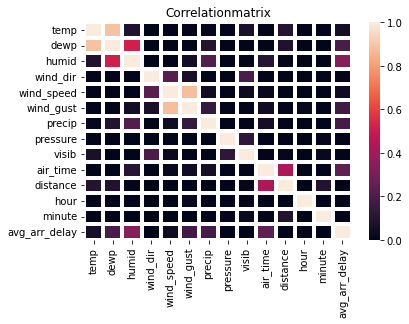

<Figure size 4320x2880 with 0 Axes>

In [156]:
#finding correlation of weather data and cancelled flight
visual_represantation(weather_df,"","","","","Correlationmatrix").heatmap()

We can see from the above correlation df and heatmap that humidity is strongly correlated with the average arrival delay of the flight whereas visibility is the weakest entity having any correlation.

Air time has a strong correlation with the average arrival delay. The other weak yet significant attributes having positive correlation with the arrival delay is dew point, wind gust and precipitation.

In [157]:
#################______QUESTION 3.3______#################
#Is there a correlation between the Federal Holiday Schedule and daily average arrival delay?
#federalholidays_2013
avg_arr_delay
fed_holidays = pd.merge(federalholidays_2013[['Federal holiday','Date_format']],avg_arr_delay[['Date','arr_delay']],left_on='Date_format',right_on='Date',how='right')
fed_holidays.drop(columns=['Date_format'],inplace=True)
fed_holidays.rename(columns={'arr_delay':'avg_daily_arr_delay'},inplace= True)

In [158]:
fed_holidays.corr()

,avg_daily_arr_delay
avg_daily_arr_delay,1.0


No concrete correlation exists between the federal holiday schecdule and daily average arrival delay.

In [159]:
#################______QUESTION 3.4______#################
#3.4 Calculate the average arrival delay for all the flights for each arrival airport (e.g. IAD, DCA, and BWI) 
#and determine most and least reliables (most reliable = the one that has the shortest average delay)

arr_airport = planned_flights.groupby(['dest'], as_index=True,axis=0).agg({'arr_delay': 'mean'}).reset_index()
arr_airport.sort_values(by='arr_delay',ascending=False)

,dest,arr_delay
2,IAD,13.866071
0,BWI,10.745552
1,DCA,9.069106


We can see from the above results that most reliable airport is DCA! Whereas the least reliable aiport is IAD.

In [160]:
#################______QUESTION 3.5______#################
#3.5 Calculate the average arrival delay for all the airlines and determine most and least reliables (most reliable = the one that has the shortest average delay)
airline_delay = planned_flights.groupby(['carrier'], as_index=True,axis=0).agg({'arr_delay': 'mean'}).reset_index()
airline_delay.sort_values(by='arr_delay',ascending=False)

,carrier,arr_delay
9,YV,18.917266
3,EV,17.359776
1,B6,12.805097
4,MQ,10.995401
7,US,5.829000
8,WN,4.915000
0,9E,3.612890
5,OO,3.000000
6,UA,-7.666667
2,DL,-8.000000


The most reliable airline from the above dataset is DL which is Delta Airlines 
whereas the least reliable airline is YV (Mesa Airlines INC.).

In [161]:
#################______QUESTION 3.6______#################
#What day of the week we had the highest average delay?

#creating new column day of week in planned flights dataframe to get the days of week as per the Date column
new_df['Day of Week'] = new_df['Date'].dt.day_name()

highest_delay = planned_flights.groupby('Day of Week').agg({'arr_delay': 'mean'}).reset_index()
highest_delay.sort_values(by='arr_delay', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Day of Week,arr_delay
1,Monday,15.433646
0,Friday,13.068331
4,Thursday,12.458195
6,Wednesday,11.315916
5,Tuesday,10.414121
3,Sunday,6.571429
2,Saturday,3.956917


**Monday** has highest average arrival delay in all the week.

In [162]:
#################______QUESTION 3.7______#################
#Which one had a higher average delay: flights that took off in the morning (6 am to 10 am), noon (11 am to 2 pm), afternoon (3 pm to 5pm), or evening (6 pm to 10 pm)?
part_of_day = []
for i in range(len(planned_flights)):
    if((planned_flights.iloc[i,3] > 600)&(planned_flights.iloc[i,3] < 1100)):
        part_of_day.append('Morning')
    elif((planned_flights.iloc[i,3] > 1100) & (planned_flights.iloc[i,3] < 1500)):
        part_of_day.append('Noon')
    elif((planned_flights.iloc[i,3] > 1500) & (planned_flights.iloc[i,3] < 1800)):
        part_of_day.append('Afternoon')
    elif((planned_flights.iloc[i,3] > 1800) & (planned_flights.iloc[i,3] < 2300)):
        part_of_day.append('Evening')
    else:
        part_of_day.append('Night')

planned_flights['Part of the Day'] = part_of_day
time_delay = planned_flights.groupby('Part of the Day').agg({'arr_delay': 'mean', 'dep_delay':'mean'}).reset_index()
time_delay.sort_values(by='dep_delay',ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Part of the Day,arr_delay,dep_delay
1,Evening,20.705296,24.693759
0,Afternoon,19.556015,19.648593
3,Night,12.782931,13.765524
4,Noon,5.416601,8.148244
2,Morning,-0.301557,1.869095


We can see from the above results that on average, arrival delay and departure delay both were highest during **evening** time.

In [163]:
planes['manufacturer'].unique()

array(['EMBRAER', 'AIRBUS INDUSTRIE', 'BOEING', 'AIRBUS',
       'BOMBARDIER INC', 'CESSNA', 'JOHN G HESS', 'GULFSTREAM AEROSPACE',
       'SIKORSKY', 'PIPER', 'AGUSTA SPA', 'PAIR MIKE E', 'DOUGLAS',
       'BEECH', 'BELL', 'AVIAT AIRCRAFT INC', 'STEWART MACO',
       'LEARJET INC', 'MCDONNELL DOUGLAS', 'CIRRUS DESIGN CORP',
       'HURLEY JAMES LARRY', 'KILDALL GARY', 'LAMBERT RICHARD',
       'BARKER JACK L', 'AMERICAN AIRCRAFT INC', 'ROBINSON HELICOPTER CO',
       'FRIEDEMANN JON', 'LEBLANC GLENN T', 'MARZ BARRY', 'DEHAVILLAND',
       'CANADAIR', 'CANADAIR LTD', 'MCDONNELL DOUGLAS CORPORATION',
       'MCDONNELL DOUGLAS AIRCRAFT CO', 'AVIONS MARCEL DASSAULT'],
      dtype=object)

In [164]:
#################______QUESTION 3.8______#################
#3.8 Determine the number of airplanes used in these flights manufactured by BOEING, EMBRAER, and AURBUS separately.
plane_data = pd.merge(planned_flights[['year','month','day','flight','tailnum','carrier']], planes[['tailnum','manufacturer','model']], how='left', left_on='tailnum', right_on='tailnum')
manufacturers_list=['BOEING', 'EMBRAER', 'AIRBUS', 'AIRBUS INDUSTRIE']
plane_data = plane_data[plane_data['manufacturer'].isin(manufacturers_list)]
plane_count = plane_data.groupby('manufacturer').agg({'flight': 'count'}).reset_index()
plane_count.rename(columns={'flight': 'flight_counts'},inplace=True)
plane_count.sort_values(by='flight_counts', ascending=False)

,manufacturer,flight_counts
3,EMBRAER,4409
1,AIRBUS INDUSTRIE,3941
2,BOEING,201
0,AIRBUS,4


In the above data we can see that there are two different names for AIRBUS (AIRBUS INDUSTRIE and AIRBUS). If we consider them same, then the count total count for
AIRBUS is 3941+4 = 3945 flights.

##QUESTION 4:

Download the "fligts_test_data.xlsx" dataset from https://github.com/simsekergun/DATA601/tree/main/2021Fall/Projects/Project2

Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx". Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LR model and eloborate on its accuracy.

In [165]:
#################______QUESTION 4______#################
#Build a linear regression model to estimate the arrival delay of the flights given in "fligts_test_data.xlsx".
#Note that you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with.
#In your report, please explain how you build the LR model and eloborate on its accuracy.

#Connect to data in google drive
#We have downloaded the all the necessary files and placed it on the drive location: "/content/drive/My Drive/Colab Notebooks/Data"

from google.colab import drive
import os
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Data
path=os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/My Drive/Colab Notebooks/Data


In [166]:
#Reading the github raw file and importing the data into dataframe
import pandas as pd

flights_test_data=pd.read_excel(path + '/flights_test_data.xlsx')
flights_test_data.head()

,year,month,day,carrier,origin,dest,distance
0,2013,1,6,MQ,JFK,DCA,213
1,2013,1,25,EV,LGA,IAD,229
2,2013,2,11,MQ,JFK,DCA,213
3,2013,4,14,US,LGA,DCA,214
4,2013,4,29,EV,LGA,IAD,229


In [167]:
flights_test_data.describe()

,year,month,day,distance
count,20.0,20.000000,20.000000,20.000000
mean,2013.0,8.100000,16.350000,215.600000
std,0.0,3.972272,9.477258,10.169097
min,2013.0,1.000000,1.000000,184.000000
25%,2013.0,4.750000,9.500000,212.750000
50%,2013.0,9.500000,15.000000,214.000000
75%,2013.0,12.000000,25.250000,217.500000
max,2013.0,12.000000,30.000000,229.000000


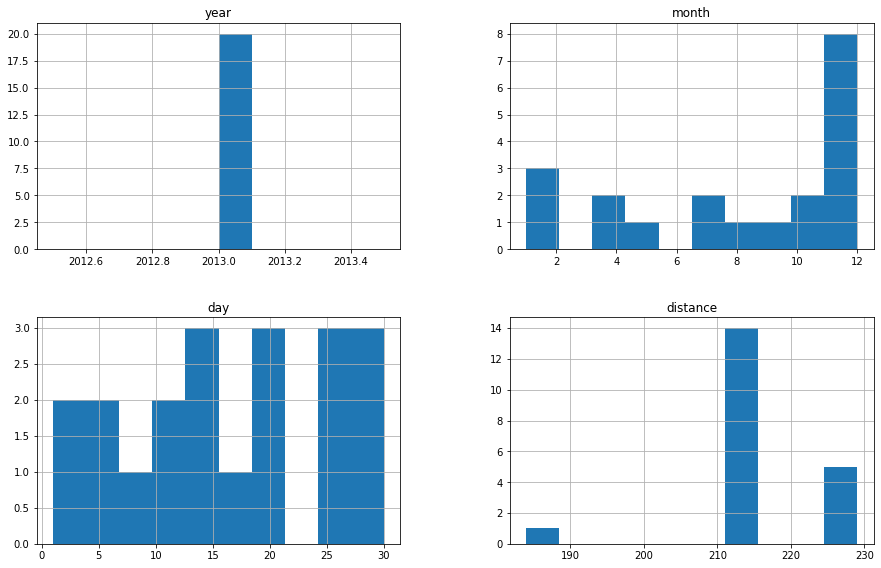

In [168]:
flights_test_data.hist(layout=(3,2), figsize=(15,15))
plt.show()

In [169]:
#merging weatherNYhourly dataset with planned_flights dataset to prepare a dataframe to select a feature for linear regression

linear_df = pd.merge(weatherNYhourly[['year','month','day','origin','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure','date']], planned_flights[['year','month','day','dep_time','dep_delay','arr_time','arr_delay','carrier','origin','dest','air_time','distance','Date']], left_on='date',right_on='Date', how = 'inner')
linear_new = pd.merge(linear_df,avg_arr_delay[['arr_delay','Date']],left_on='date',right_on='Date', how='inner')
linear_new.drop(columns=['year_y','month_y','day_y','origin_y','Date_x','Date_y'],inplace=True)
linear_new.rename(columns={'year_x':'year','month_x':'month','day_x':'day','arr_delay_x':'arr_delay','arr_delay_y':'avg_arr_delay','origin_x':'origin'}, inplace=True)
#dropping the nan values of wind_gust has a positive relation with the flights data and nan values will yield into the expected result
linear_new = linear_new[linear_new['wind_gust'].notna()]
linear_new.head(2)

,year,month,day,origin,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,date,dep_time,dep_delay,arr_time,arr_delay,carrier,dest,air_time,distance,avg_arr_delay
560,2013,1,1,EWR,37.04,19.94,49.62,300.0,13.80936,20.71404,0.0,1012.1,2013-01-01,629.0,-1.0,721.0,-19.0,WN,BWI,40.0,185,34.075
561,2013,1,1,EWR,37.04,19.94,49.62,300.0,13.80936,20.71404,0.0,1012.1,2013-01-01,848.0,853.0,1001.0,851.0,MQ,BWI,41.0,184,34.075


In [170]:
#filling all other nan values with 0 so that linear regression model does not throw error for nan values
linear_new = linear_new.fillna(0)
linear_new.head(2)

,year,month,day,origin,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,date,dep_time,dep_delay,arr_time,arr_delay,carrier,dest,air_time,distance,avg_arr_delay
560,2013,1,1,EWR,37.04,19.94,49.62,300.0,13.80936,20.71404,0.0,1012.1,2013-01-01,629.0,-1.0,721.0,-19.0,WN,BWI,40.0,185,34.075
561,2013,1,1,EWR,37.04,19.94,49.62,300.0,13.80936,20.71404,0.0,1012.1,2013-01-01,848.0,853.0,1001.0,851.0,MQ,BWI,41.0,184,34.075


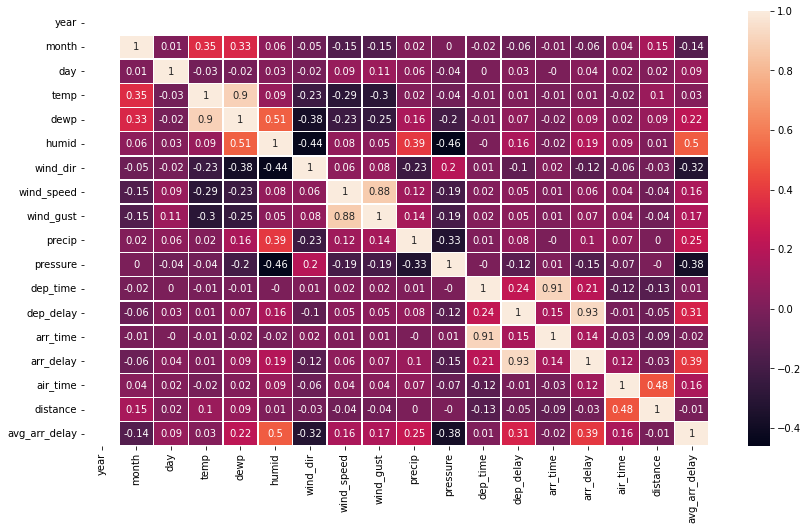

In [171]:
corr_matrix = linear_new.corr().round(2)

#Creating the seaborn:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(data=corr_matrix, annot=True, linewidths=.5, ax=ax)

In [172]:
#importing libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
# for Hypothesis Testing, if required
import statsmodels.api as sm
import statsmodels.formula.api as smf


X = linear_new[['year','month','day','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure','dep_time','dep_delay','arr_time','air_time','distance','avg_arr_delay']]
Y = linear_new['arr_delay']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=1)

##  Linear Regression Fitting example
model = LinearRegression()
model.fit(pd.DataFrame(X_train), pd.DataFrame(Y_train))
#
## prediction example
y_test_predict = model.predict(pd.DataFrame(X_test))

## model evaluation
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)
print('Root Mean Squared value: ', rmse)
print('R squared value: ',r2)

Root Mean Squared value:  13.619875649678226
R squared value:  0.9010120089569861


In [173]:
#giving a datetime column to flight_test_data
flights_test_data_new = flights_test_data.copy()
flights_test_data_new['date'] = pd.to_datetime(flights_test_data_new[['year','month','day']])
flights_test_data_new.head(2)

,year,month,day,carrier,origin,dest,distance,date
0,2013,1,6,MQ,JFK,DCA,213,2013-01-06
1,2013,1,25,EV,LGA,IAD,229,2013-01-25


In [174]:
#merging the above fed data 'linear_new' with the flight_test_data on joining on 'date' feature. 
#we are doing this step because the data initially given for the test only contains 4 columns with non-str values. 
#due to this we had to select the same columns for building a model and it was giving a biased value
#now this new dataframe has all the columns for providing it to test data

predict_data = pd.merge(linear_new[['year','month','day','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure',
                                    'dep_time','dep_delay','arr_time','air_time','distance','avg_arr_delay','date']],
                        flights_test_data_new[['year','month','day','distance','date']], left_on='date',right_on='date',how='right')
predict_data.drop(columns=['year_y','month_y','day_y','distance_x'],inplace=True)
predict_data.rename(columns={'year_x':'year','month_x':'month','day_x':'day','distance_y':'distance'},inplace=True)
predict_data.head(2)

,year,month,day,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,dep_time,dep_delay,arr_time,air_time,avg_arr_delay,date,distance
0,2013.0,1.0,6.0,46.94,26.96,45.48,240.0,13.80936,19.56326,0.0,1015.5,815.0,-5.0,940.0,41.0,1.707317,2013-01-06,213
1,2013.0,1.0,6.0,46.94,26.96,45.48,240.0,13.80936,19.56326,0.0,1015.5,1207.0,-3.0,1310.0,42.0,1.707317,2013-01-06,213


In [175]:
#finding mean of the columns which we will use to impute the data having null values
avg = predict_data.mean()
avg

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



year             2013.000000
month               6.931960
day                19.827860
temp               50.178899
dewp               28.561088
humid              45.233565
wind_dir          277.165701
wind_speed         16.370766
wind_gust          24.754244
precip              0.000049
pressure         1011.059594
dep_time         1396.382486
dep_delay           7.673750
arr_time         1502.734814
air_time           45.224834
avg_arr_delay       7.011286
distance          215.922978
dtype: float64

In [176]:
#grouping the dataframe by the 'date' columns to get the data only equal to the date of 'flight_test_data'.
predict_new = predict_data.groupby('date').mean().reset_index()
#filling the null values in the dataframe with the average values calculated in above cell
predict_new.fillna(avg,inplace=True)
predict_new.head(2)

,date,year,month,day,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,dep_time,dep_delay,arr_time,air_time,avg_arr_delay,distance
0,2013-01-06,2013.0,1.0,6.000000,46.49,24.755000,42.272500,252.50000,14.097055,20.426345,0.0,1015.475000,1492.414634,5.463415,1614.024390,45.707317,1.707317,213
1,2013-01-25,2013.0,1.0,24.333333,17.00,-1.617143,43.518095,300.47619,16.987705,27.015930,0.0,1029.371429,1409.759259,32.129630,1370.925926,43.222222,47.557692,229


In [177]:
#assigning the test data to the X1 and predicing the arrival delay for the same
X1 = predict_new[['year','month','day','temp','dewp','humid','wind_dir','wind_speed','wind_gust','precip','pressure','dep_time','dep_delay','arr_time','air_time','distance','avg_arr_delay']]

y1_test_predict = model.predict(pd.DataFrame(X1))

print(y1_test_predict)

[[ 0.80857912]
 [31.01869082]
 [ 4.49944166]
 [-2.7700842 ]
 [-3.777508  ]
 [-6.86408003]
 [ 6.18457055]
 [ 3.08238707]
 [44.98640899]
 [ 4.324471  ]
 [18.43866172]
 [-4.42244972]
 [ 1.31768931]
 [ 1.69991109]
 [ 4.67441233]
 [-7.16921687]
 [35.87793846]
 [10.68709149]
 [37.55225502]
 [ 0.52142724]]


In [178]:
#adding the estimated arrival delay values in the flights_test dataset
flights_test_data_new['estimated_arr_delay'] = pd.DataFrame(y1_test_predict)
flights_test_data_new

,year,month,day,carrier,origin,dest,distance,date,estimated_arr_delay
0,2013,1,6,MQ,JFK,DCA,213,2013-01-06,0.808579
1,2013,1,25,EV,LGA,IAD,229,2013-01-25,31.018691
2,2013,2,11,MQ,JFK,DCA,213,2013-02-11,4.499442
3,2013,4,14,US,LGA,DCA,214,2013-04-14,-2.770084
4,2013,4,29,EV,LGA,IAD,229,2013-04-29,-3.777508
5,2013,5,26,MQ,JFK,DCA,213,2013-05-26,-6.864080
6,2013,7,14,MQ,JFK,BWI,184,2013-07-14,6.184571
7,2013,7,16,US,LGA,DCA,214,2013-07-16,3.082387
8,2013,8,1,EV,EWR,IAD,212,2013-08-01,44.986409
9,2013,9,29,US,LGA,DCA,214,2013-09-29,4.324471


##QUESTION 5:

Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. In your report, please explain how you build the LogReg model and eloborate on its accuracy.

In [179]:
#################______QUESTION 5______#################
#Build a logistic regression model to guess the 3 cancelled flights given in "fligts_test_data.xlsx". 
#Again, you have the full autorithy to decide what columns, what datasets (among the given datasets) to work with. 
#In your report, please explain how you build the LogReg model and eloborate on its accuracy.

flights2DCMDVA.head(2)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0


In [180]:
weatherNYhourly.head(2)

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour,date
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z,2013-01-01
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z,2013-01-01


In [181]:
#Creating new dataframe based on maximum windspeed:
Weather_max = weatherNYhourly.groupby(['date'], axis=0, as_index=True).agg({'temp':'max','dewp':'max','humid':'max','wind_dir':'max'
,'wind_speed':'max','wind_gust':'max','precip':'max','pressure':'max','visib':'max'}).reset_index()
Weather_max.rename(columns= {'temp':'max_temp','dewp':'max_dewp','humid':'max_humid','wind_dir':'max_wind_dir'
,'wind_speed':'max_wind_speed','wind_gust':'max_wind_gust','precip':'max_precip','pressure':'max_pressure','visib':'max_visib'},inplace= True)
Weather_max

,date,max_temp,max_dewp,max_humid,max_wind_dir,max_wind_speed,max_wind_gust,max_precip,max_pressure,max_visib
0,2013-01-01,41.00,28.40,69.67,340.0,18.41248,28.76950,0.00,1014.2,10.0
1,2013-01-02,35.06,15.08,54.95,350.0,24.16638,35.67418,0.00,1020.6,10.0
2,2013-01-03,33.98,17.96,65.84,340.0,16.11092,21.86482,0.00,1022.9,10.0
3,2013-01-04,39.92,21.92,68.68,280.0,24.16638,31.07106,0.00,1019.9,10.0
4,2013-01-05,44.06,24.98,64.03,340.0,20.71404,28.76950,0.00,1025.2,10.0
...,...,...,...,...,...,...,...,...,...,...
359,2013-12-26,37.94,24.98,71.26,340.0,17.26170,21.86482,0.00,1033.4,10.0
360,2013-12-27,42.08,23.00,72.12,310.0,18.41248,28.76950,0.00,1028.7,10.0
361,2013-12-28,55.94,32.00,78.27,310.0,20.71404,28.76950,0.00,1027.5,10.0
362,2013-12-29,48.92,48.02,100.00,350.0,20.71404,33.37262,0.38,1020.5,10.0


In [182]:
#Adding date column on flights2DCMDVA dataframe:
import pandas as pd

flights2DCMDVA['date'] = pd.to_datetime(flights2DCMDVA[["year", "month", "day"]])
flights2DCMDVA.head(2)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,2013-01-01
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,2013-01-01


In [183]:
#Creating new df from flights2DCMDVA df and Weather_max df:

flights2DCMDVA_LogR = pd.merge(flights2DCMDVA, Weather_max, left_on= ['date'], right_on= ['date'], how='left')
flights2DCMDVA_LogR.head(2)

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,max_temp,max_dewp,max_humid,max_wind_dir,max_wind_speed,max_wind_gust,max_precip,max_pressure,max_visib
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0


In [184]:
#Adding date column on flights_test_data dataframe:
flights_test_data['date'] = pd.to_datetime(flights_test_data[["year", "month", "day"]])
flights_test_data

,year,month,day,carrier,origin,dest,distance,date
0,2013,1,6,MQ,JFK,DCA,213,2013-01-06
1,2013,1,25,EV,LGA,IAD,229,2013-01-25
2,2013,2,11,MQ,JFK,DCA,213,2013-02-11
3,2013,4,14,US,LGA,DCA,214,2013-04-14
4,2013,4,29,EV,LGA,IAD,229,2013-04-29
5,2013,5,26,MQ,JFK,DCA,213,2013-05-26
6,2013,7,14,MQ,JFK,BWI,184,2013-07-14
7,2013,7,16,US,LGA,DCA,214,2013-07-16
8,2013,8,1,EV,EWR,IAD,212,2013-08-01
9,2013,9,29,US,LGA,DCA,214,2013-09-29


In [185]:
#Creating new df from test df and Weather_max df:

flights_test_data_LogR = pd.merge(flights_test_data, Weather_max, left_on= ['date'], right_on= ['date'], how='left')
flights_test_data_LogR

,year,month,day,carrier,origin,dest,distance,date,max_temp,max_dewp,max_humid,max_wind_dir,max_wind_speed,max_wind_gust,max_precip,max_pressure,max_visib
0,2013,1,6,MQ,JFK,DCA,213,2013-01-06,48.02,33.80,93.08,320.0,16.11092,23.01560,0.00,1025.3,10.0
1,2013,1,25,EV,LGA,IAD,229,2013-01-25,24.80,15.98,87.64,350.0,23.01560,35.67418,0.01,1030.4,10.0
2,2013,2,11,MQ,JFK,DCA,213,2013-02-11,44.60,42.80,100.00,360.0,20.71404,NaN,0.17,1029.6,10.0
3,2013,4,14,US,LGA,DCA,214,2013-04-14,60.08,44.96,92.78,360.0,24.16638,33.37262,0.00,1021.4,10.0
4,2013,4,29,EV,LGA,IAD,229,2013-04-29,59.00,50.00,86.41,200.0,12.65858,17.26170,0.03,1024.7,10.0
5,2013,5,26,MQ,JFK,DCA,213,2013-05-26,71.06,37.94,65.56,350.0,29.92028,41.42808,0.00,1019.5,10.0
6,2013,7,14,MQ,JFK,BWI,184,2013-07-14,93.02,75.20,94.19,340.0,19.56326,24.16638,0.00,1027.2,10.0
7,2013,7,16,US,LGA,DCA,214,2013-07-16,96.08,73.04,79.20,360.0,16.11092,24.16638,0.00,1022.6,10.0
8,2013,8,1,EV,EWR,IAD,212,2013-08-01,78.08,69.80,94.06,220.0,19.56326,20.71404,0.23,1018.2,10.0
9,2013,9,29,US,LGA,DCA,214,2013-09-29,71.06,57.92,93.08,180.0,11.50780,NaN,0.00,1024.9,10.0


In [186]:
#Finding the correlation:

flights2DCMDVA_LogR.corr()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,flight,air_time,distance,hour,minute,max_temp,max_dewp,max_humid,max_wind_dir,max_wind_speed,max_wind_gust,max_precip,max_pressure,max_visib
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.015790,-0.014432,-0.032720,-0.008812,-0.041417,-0.010095,-0.000871,0.129862,-0.014517,0.004656,0.334250,0.336377,0.048049,-0.025944,-0.095624,-0.188188,0.027563,0.062292,0.047663
day,NaN,-0.015790,1.000000,-0.001941,0.007897,-0.001104,0.010095,-0.001978,-0.010473,0.011044,-0.001956,0.000707,0.032734,0.026356,0.045117,0.031795,-0.022009,0.028798,-0.077930,0.005454,0.036664
dep_time,NaN,-0.014432,-0.001941,1.000000,0.243527,0.911824,0.205924,-0.044346,-0.078914,-0.131798,0.999275,-0.150200,-0.004288,-0.001115,0.001299,0.001264,-0.000334,0.009702,0.014462,-0.011108,0.003940
dep_delay,NaN,-0.032720,0.007897,0.243527,1.000000,0.141670,0.938089,0.095241,0.031904,-0.021455,0.247723,-0.150162,0.021963,0.076054,0.132175,-0.045478,-0.012658,0.093138,0.164603,-0.058173,0.017758
arr_time,NaN,-0.008812,-0.001104,0.911824,0.141670,1.000000,0.126411,-0.056656,-0.037187,-0.095911,0.910256,-0.113244,-0.015581,-0.015229,-0.009260,0.008791,-0.000479,-0.002796,-0.002531,-0.003674,0.003447
arr_delay,NaN,-0.041417,0.010095,0.205924,0.938089,0.126411,1.000000,0.070245,0.181261,-0.010310,0.209946,-0.139255,0.015907,0.085235,0.163849,-0.057408,-0.013829,0.115225,0.190333,-0.070816,0.025045
flight,NaN,-0.010095,-0.001978,-0.044346,0.095241,-0.056656,0.070245,1.000000,0.065258,0.147073,-0.037668,-0.165965,0.012663,0.005924,-0.004715,-0.009125,-0.003762,-0.004828,-0.001672,-0.012271,-0.005655
air_time,NaN,-0.000871,-0.010473,-0.078914,0.031904,-0.037187,0.181261,0.065258,1.000000,0.433924,-0.078663,0.006824,-0.071256,0.002782,0.123517,-0.066427,0.008460,0.090185,0.127231,-0.058473,0.029996
distance,NaN,0.129862,0.011044,-0.131798,-0.021455,-0.095911,-0.010310,0.147073,0.433924,1.000000,-0.134520,0.092978,0.099207,0.091140,0.020182,-0.020173,-0.019559,-0.035379,0.014364,-0.005072,0.019559


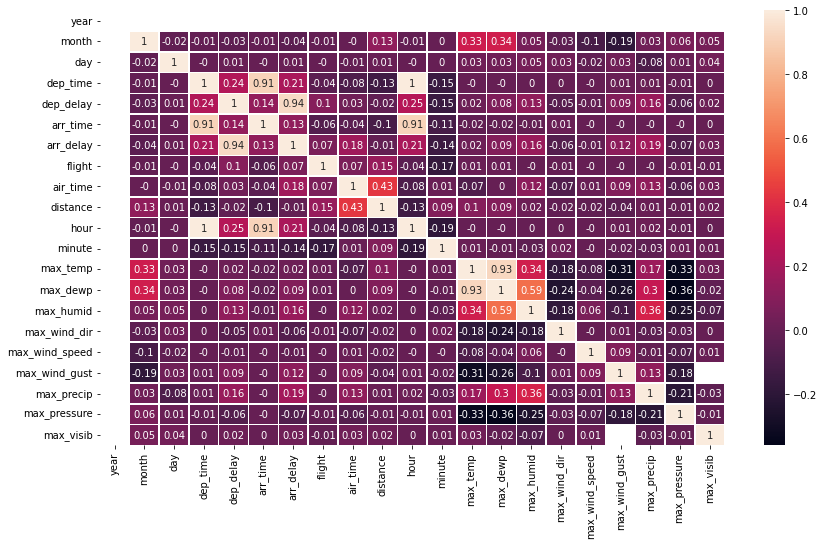

In [187]:
corr_matrix1 = flights2DCMDVA_LogR.corr().round(2)

#Creating the seaborn:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(data=corr_matrix1, annot=True, linewidths=.5, ax=ax)

In [188]:
#Finding the correlation:

flights_test_data_LogR.corr()

,year,month,day,distance,max_temp,max_dewp,max_humid,max_wind_dir,max_wind_speed,max_wind_gust,max_precip,max_pressure,max_visib
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
month,NaN,1.000000,-0.070881,-0.019805,0.021429,0.016566,-0.209293,-0.103513,-0.411034,-0.378083,-0.248590,-0.137431,NaN
day,NaN,-0.070881,1.000000,0.145156,0.005770,-0.116189,-0.234352,-0.095717,0.218449,0.340059,-0.378635,-0.027939,NaN
distance,NaN,-0.019805,0.145156,1.000000,-0.529831,-0.461418,-0.119254,-0.223030,-0.089835,0.004442,-0.028703,0.401121,NaN
max_temp,NaN,0.021429,0.005770,-0.529831,1.000000,0.912888,0.017050,-0.262655,0.037143,-0.106109,0.076324,-0.382955,NaN
max_dewp,NaN,0.016566,-0.116189,-0.461418,0.912888,1.000000,0.339725,-0.375164,-0.118221,-0.330346,0.280201,-0.294530,NaN
max_humid,NaN,-0.209293,-0.234352,-0.119254,0.017050,0.339725,1.000000,-0.244491,-0.087972,-0.411217,0.339964,0.011573,NaN
max_wind_dir,NaN,-0.103513,-0.095717,-0.223030,-0.262655,-0.375164,-0.244491,1.000000,0.127240,0.322127,-0.152667,0.181384,NaN
max_wind_speed,NaN,-0.411034,0.218449,-0.089835,0.037143,-0.118221,-0.087972,0.127240,1.000000,0.880694,0.138080,-0.038203,NaN
max_wind_gust,NaN,-0.378083,0.340059,0.004442,-0.106109,-0.330346,-0.411217,0.322127,0.880694,1.000000,-0.248468,-0.008571,NaN


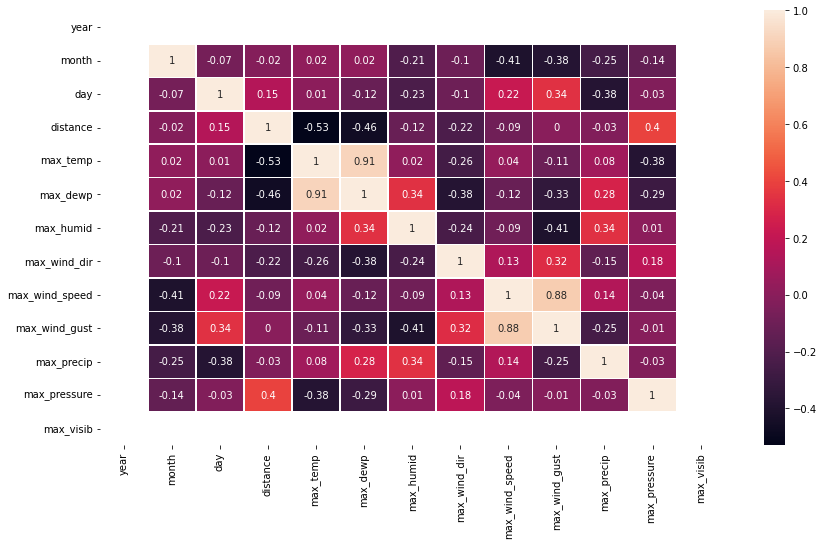

In [189]:
corr_matrix2 = flights_test_data_LogR.corr().round(2)

#Creating the seaborn:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14,8))
sns.heatmap(data=corr_matrix2, annot=True, linewidths=.5, ax=ax)

##There is a strong correlation between:
#1. max_wind_gust and max_wind_speed 
#2. max_temp and max_dewp

In [190]:
#Finding the NaN values:
flights2DCMDVA_LogR[flights2DCMDVA_LogR.dep_time.isna()]

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,max_temp,max_dewp,max_humid,max_wind_dir,max_wind_speed,max_wind_gust,max_precip,max_pressure,max_visib
136,2013,1,13,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN,2013-01-13,48.92,46.04,100.00,260.0,14.96014,NaN,0.00,1021.9,10.0
137,2013,1,13,NaN,NaN,NaN,NaN,MQ,N655MQ,3944,JFK,BWI,NaN,184,NaN,NaN,2013-01-13,48.92,46.04,100.00,260.0,14.96014,NaN,0.00,1021.9,10.0
167,2013,1,16,NaN,NaN,NaN,NaN,9E,NaN,3635,JFK,BWI,NaN,184,NaN,NaN,2013-01-16,39.02,35.06,100.00,360.0,19.56326,23.01560,0.19,1025.4,10.0
204,2013,1,20,NaN,NaN,NaN,NaN,EV,N16178,4316,EWR,BWI,NaN,169,NaN,NaN,2013-01-20,55.94,32.00,72.24,300.0,28.76950,42.57886,0.00,1017.7,10.0
213,2013,1,21,NaN,NaN,NaN,NaN,9E,NaN,4091,JFK,BWI,NaN,184,NaN,NaN,2013-01-21,41.00,19.94,63.36,320.0,20.71404,29.92028,0.00,1019.7,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17115,2013,12,26,NaN,NaN,NaN,NaN,EV,N877AS,5712,JFK,IAD,NaN,228,NaN,NaN,2013-12-26,37.94,24.98,71.26,340.0,17.26170,21.86482,0.00,1033.4,10.0
17116,2013,12,26,NaN,NaN,NaN,NaN,EV,N877AS,5736,LGA,IAD,NaN,229,NaN,NaN,2013-12-26,37.94,24.98,71.26,340.0,17.26170,21.86482,0.00,1033.4,10.0
17147,2013,12,29,NaN,NaN,NaN,NaN,EV,N835AS,5769,LGA,IAD,NaN,229,NaN,NaN,2013-12-29,48.92,48.02,100.00,350.0,20.71404,33.37262,0.38,1020.5,10.0
17157,2013,12,30,NaN,NaN,NaN,NaN,EV,N832AS,5714,JFK,IAD,NaN,228,NaN,NaN,2013-12-30,46.94,39.92,95.82,340.0,23.01560,28.76950,0.00,1021.1,10.0


In [191]:
#Creating new column for flagging:
flights2DCMDVA_LogR['cancelled_flag'] = flights2DCMDVA_LogR['dep_time']
flights2DCMDVA_LogR

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,max_temp,max_dewp,max_humid,max_wind_dir,max_wind_speed,max_wind_gust,max_precip,max_pressure,max_visib,cancelled_flag
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,629.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,848.0
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,1059.0
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,1158.0
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,1316.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,LGA,IAD,44.0,229,11.0,5.0,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1105.0
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,JFK,IAD,59.0,228,14.0,6.0,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1406.0
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,LGA,IAD,52.0,229,14.0,30.0,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1430.0
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,JFK,IAD,51.0,228,14.0,47.0,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1447.0


In [192]:
##Assigning a cancelled flag based on condition where: If value is NaN then flag = 1 else 0:
flights2DCMDVA_LogR['cancelled_flag'].replace(np.NAN, 1, inplace=True)  # for replacing nan to 1

flights2DCMDVA_LogR['cancelled_flag'][flights2DCMDVA_LogR['cancelled_flag'] != 1] = 0     # for replacing others to 0
flights2DCMDVA_LogR

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,max_temp,max_dewp,max_humid,max_wind_dir,max_wind_speed,max_wind_gust,max_precip,max_pressure,max_visib,cancelled_flag
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,0.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,0.0
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,0.0
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,0.0
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,LGA,IAD,44.0,229,11.0,5.0,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,JFK,IAD,59.0,228,14.0,6.0,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,LGA,IAD,52.0,229,14.0,30.0,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,JFK,IAD,51.0,228,14.0,47.0,2013-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [193]:
flights2DCMDVA_LogR['cancelled_flag'].unique()

array([0., 1.])

In [194]:
#Finding Nan Values
#flights2DCMDVA_LogR['cancelled_flag'].isnull().values.any()

In [195]:
#Removing the NaN values
flights2DCMDVA_LogR.fillna(0)
flights2DCMDVA_LogR['dep_time'] = flights2DCMDVA_LogR['dep_time'].fillna(0)
flights2DCMDVA_LogR['dep_delay'] = flights2DCMDVA_LogR['dep_delay'].fillna(0)
flights2DCMDVA_LogR['arr_time'] = flights2DCMDVA_LogR['arr_time'].fillna(0)
flights2DCMDVA_LogR['arr_delay'] = flights2DCMDVA_LogR['arr_delay'].fillna(0)
flights2DCMDVA_LogR['tailnum'] = flights2DCMDVA_LogR['tailnum'].fillna(0)
flights2DCMDVA_LogR['air_time'] = flights2DCMDVA_LogR['air_time'].fillna(0)
flights2DCMDVA_LogR['hour'] = flights2DCMDVA_LogR['hour'].fillna(0)
flights2DCMDVA_LogR['minute'] = flights2DCMDVA_LogR['minute'].fillna(0)
flights2DCMDVA_LogR['max_temp'] = flights2DCMDVA_LogR['max_temp'].fillna(0)
flights2DCMDVA_LogR['max_dewp'] = flights2DCMDVA_LogR['max_dewp'].fillna(0)
flights2DCMDVA_LogR['max_humid'] = flights2DCMDVA_LogR['max_humid'].fillna(0)
flights2DCMDVA_LogR['max_wind_dir'] = flights2DCMDVA_LogR['max_wind_dir'].fillna(0)
flights2DCMDVA_LogR['max_wind_speed'] = flights2DCMDVA_LogR['max_wind_speed'].fillna(0)
flights2DCMDVA_LogR['max_wind_gust'] = flights2DCMDVA_LogR['max_wind_gust'].fillna(0)
flights2DCMDVA_LogR['max_precip'] = flights2DCMDVA_LogR['max_precip'].fillna(0)
flights2DCMDVA_LogR['max_pressure'] = flights2DCMDVA_LogR['max_pressure'].fillna(0)
flights2DCMDVA_LogR['max_visib'] = flights2DCMDVA_LogR['max_visib'].fillna(0)

flights2DCMDVA_LogR

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute,date,max_temp,max_dewp,max_humid,max_wind_dir,max_wind_speed,max_wind_gust,max_precip,max_pressure,max_visib,cancelled_flag
0,2013,1,1,629.0,-1.0,721.0,-19.0,WN,N273WN,4646,LGA,BWI,40.0,185,6.0,29.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,0.0
1,2013,1,1,848.0,853.0,1001.0,851.0,MQ,N942MQ,3944,JFK,BWI,41.0,184,8.0,48.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,0.0
2,2013,1,1,1059.0,-1.0,1201.0,-14.0,WN,N505SW,321,LGA,BWI,43.0,185,10.0,59.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,0.0
3,2013,1,1,1158.0,-2.0,1256.0,-4.0,WN,N783SW,1568,EWR,BWI,38.0,169,11.0,58.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,0.0
4,2013,1,1,1316.0,2.0,1412.0,-3.0,EV,N11551,4340,EWR,BWI,38.0,169,13.0,16.0,2013-01-01,41.0,28.4,69.67,340.0,18.41248,28.7695,0.0,1014.2,10.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17161,2013,12,31,1105.0,53.0,1211.0,36.0,EV,N835AS,5769,LGA,IAD,44.0,229,11.0,5.0,2013-12-31,0.0,0.0,0.00,0.0,0.00000,0.0000,0.0,0.0,0.0,0.0
17162,2013,12,31,1406.0,0.0,1534.0,8.0,EV,N826AS,5712,JFK,IAD,59.0,228,14.0,6.0,2013-12-31,0.0,0.0,0.00,0.0,0.00000,0.0000,0.0,0.0,0.0,0.0
17163,2013,12,31,1430.0,-2.0,1546.0,-9.0,YV,N515MJ,3771,LGA,IAD,52.0,229,14.0,30.0,2013-12-31,0.0,0.0,0.00,0.0,0.00000,0.0000,0.0,0.0,0.0,0.0
17164,2013,12,31,1447.0,-7.0,1604.0,-27.0,9E,N8477R,2946,JFK,IAD,51.0,228,14.0,47.0,2013-12-31,0.0,0.0,0.00,0.0,0.00000,0.0000,0.0,0.0,0.0,0.0


In [196]:
#Removing the NaN values from test dataframe:
flights_test_data_LogR['max_wind_gust'] = flights_test_data_LogR['max_wind_gust'].fillna(0)

In [197]:
# Preparing the data for training the model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import bar
# sklearn stuff
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error

In [198]:
#Applying SMOTE analysis to make the unbiased data:
#Referred from https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/

from imblearn.over_sampling import SMOTE

x2 = flights2DCMDVA_LogR[['month', 'day', 'distance', 'max_temp', 'max_dewp', 'max_humid', 'max_wind_dir', 'max_wind_speed', 'max_wind_gust', 'max_precip', 'max_pressure', 'max_visib']]
y2 = flights2DCMDVA_LogR[['cancelled_flag']]

s = SMOTE()
X_resampled, Y_resampled = s.fit_resample(x2,y2)
Y_resampled.value_counts()

cancelled_flag
1.0               16227
0.0               16227
dtype: int64

In [199]:
#Referring from "DATA601L10_LogisticRegression.ipynb" lecture notebook
#Spliting the data:

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_resampled, Y_resampled, test_size=0.2, random_state=1)

# fit the model
logreg2 = LogisticRegression()
logreg2.fit(X_train2, y_train2)
#logreg2.fit(x2,y2)

# evaluate the model
y_predict2 = logreg2.predict(X_test2)
print(y_predict2.size)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



6491


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [200]:
#Creating the xtestdataset values for flights_test_data_LogR
xtestdataset=flights_test_data_LogR[['month', 'day', 'distance', 'max_temp', 'max_dewp', 'max_humid', 'max_wind_dir', 'max_wind_speed', 'max_wind_gust', 'max_precip', 'max_pressure', 'max_visib']]

In [201]:
#Creating the y_predict3 values for flights_test_data_LogR
y_predict3 = logreg2.predict(xtestdataset)

In [202]:
y_predict3

array([1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 1.])

In [203]:
#Populating the cancelled_flag value of predicted flights2DCMDVA_LogR dataframe into flights_test_data_LogR
flights_test_data_LogR['cancelled_flag']=y_predict3

In [204]:
flights_test_data_LogR

,year,month,day,carrier,origin,dest,distance,date,max_temp,max_dewp,max_humid,max_wind_dir,max_wind_speed,max_wind_gust,max_precip,max_pressure,max_visib,cancelled_flag
0,2013,1,6,MQ,JFK,DCA,213,2013-01-06,48.02,33.80,93.08,320.0,16.11092,23.01560,0.00,1025.3,10.0,1.0
1,2013,1,25,EV,LGA,IAD,229,2013-01-25,24.80,15.98,87.64,350.0,23.01560,35.67418,0.01,1030.4,10.0,1.0
2,2013,2,11,MQ,JFK,DCA,213,2013-02-11,44.60,42.80,100.00,360.0,20.71404,0.00000,0.17,1029.6,10.0,1.0
3,2013,4,14,US,LGA,DCA,214,2013-04-14,60.08,44.96,92.78,360.0,24.16638,33.37262,0.00,1021.4,10.0,1.0
4,2013,4,29,EV,LGA,IAD,229,2013-04-29,59.00,50.00,86.41,200.0,12.65858,17.26170,0.03,1024.7,10.0,1.0
5,2013,5,26,MQ,JFK,DCA,213,2013-05-26,71.06,37.94,65.56,350.0,29.92028,41.42808,0.00,1019.5,10.0,0.0
6,2013,7,14,MQ,JFK,BWI,184,2013-07-14,93.02,75.20,94.19,340.0,19.56326,24.16638,0.00,1027.2,10.0,0.0
7,2013,7,16,US,LGA,DCA,214,2013-07-16,96.08,73.04,79.20,360.0,16.11092,24.16638,0.00,1022.6,10.0,0.0
8,2013,8,1,EV,EWR,IAD,212,2013-08-01,78.08,69.80,94.06,220.0,19.56326,20.71404,0.23,1018.2,10.0,1.0
9,2013,9,29,US,LGA,DCA,214,2013-09-29,71.06,57.92,93.08,180.0,11.50780,0.00000,0.00,1024.9,10.0,0.0


In [205]:
#Confusion matrix, Accuracy, sensitivity and specificity
from sklearn.metrics import confusion_matrix

cm2 = confusion_matrix(y_test2,y_predict2)
print('Confusion Matrix : \n', cm2)

total2=sum(sum(cm2))
#####from confusion matrix calculate accuracy
accuracy2=(cm2[0,0]+cm2[1,1])/total2
print ('Accuracy : ', accuracy2)

sensitivity2 = cm2[0,0]/(cm2[0,0]+cm2[0,1])
print('Sensitivity : ', sensitivity2 )

specificity2 = cm2[1,1]/(cm2[1,0]+cm2[1,1])
print('Specificity : ', specificity2)

Confusion Matrix : 
 [[2041 1269]
 [ 899 2282]]
Accuracy :  0.6659990756431983
Sensitivity :  0.6166163141993958
Specificity :  0.7173844702923609


####################################----END OF FILE-------###################################################